In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

/home/lj7/anaconda2/envs/dev-mph/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
!ls /SNS/ARCS/2012_2_18_CAL/0/30585/NeXus

ARCS_30585_event.nxs  ARCS_30585_histo.nxs


In [7]:
!mcvine instruments arcs nxs reduce --help

/home/lj7/anaconda2/envs/dev-mph/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/anaconda2/envs/dev-mph.
  warnings.warn(msg)
Usage: mcvine instruments arcs nxs reduce [OPTIONS] NXS

  run reduction

Options:
  --out TEXT                      output path. Eg. iqe.nxs
  --use_ei_guess TEXT
  --ei_guess FLOAT                guess for Ei
  --qaxis <FLOAT FLOAT FLOAT>...  Qmin Qmax dQ
  --eaxis <FLOAT FLOAT FLOAT>...  Emin Emax dE
  --help                          Show this message and exit.


In [9]:
!mcvine instruments arcs nxs reduce /SNS/ARCS/2012_2_18_CAL/0/30585/NeXus/ARCS_30585_event.nxs\
  --out=v30585-iqe.nxs --eaxis -100 100 1. --qaxis 0 15 .1

/home/lj7/anaconda2/envs/dev-mph/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/anaconda2/envs/dev-mph.
  warnings.warn(msg)
/home/lj7/anaconda2/envs/dev-mph/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/dev-mph/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
DgsReduction-[Notice] DgsReduction started
DgsCo

In [2]:
!mcvine mantid extract_iqe v30585-iqe.nxs v30585-iqe.h5

/home/lj7/anaconda2/envs/dev-mph/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/anaconda2/envs/dev-mph.
  warnings.warn(msg)


plot z in (0, 1.20380248693)


<IPython.core.display.Javascript object>


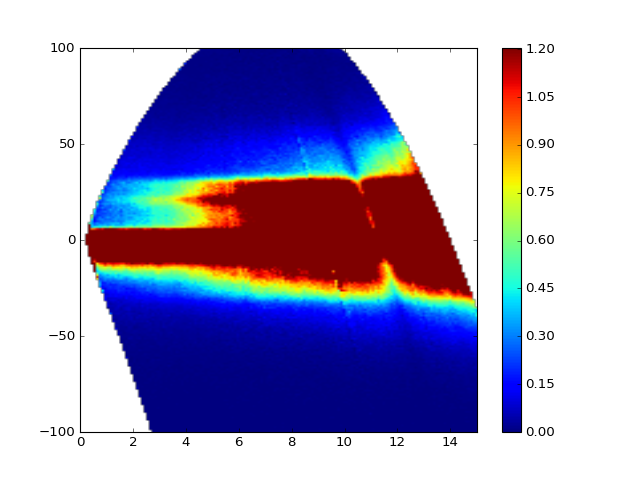

In [4]:
iqe = hh.load("v30585-iqe.h5")
H.plot(iqe, min=0)

In [25]:
# load data
iqehist = hh.load("./v30585-iqe.h5") 
# interpolate data
from multiphonon.sqe import interp
newiqe = interp(iqehist, newE = np.arange(-70, 70, 1.))
# save interpolated data
hh.dump(newiqe, 'tmp-iqe-interped.h5')
# create processing engine
from multiphonon.backward import sqe2dos
iterdos = sqe2dos.sqe2dos(
  newiqe, T=300, Ecutoff=50., 
  elastic_E_cutoff=(-20., 7), M=50.94,
  C_ms=0.3, Ei=116.446, workdir='work-V')
doses = [i for i in iterdos]


<IPython.core.display.Javascript object>


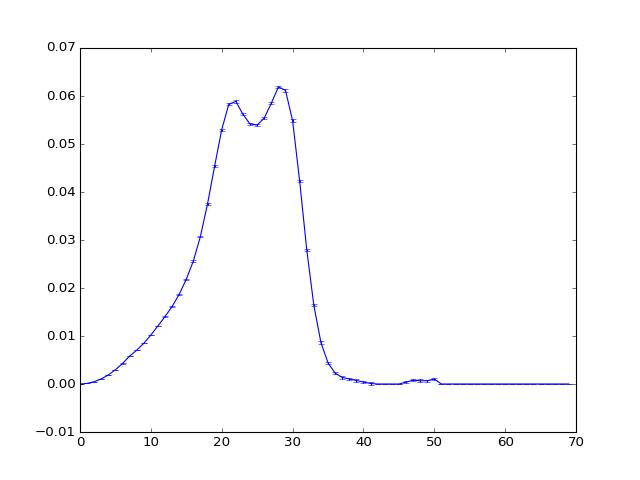

In [26]:
H.plot(doses[-1])

In [27]:
!python work-V/round-6/plot_se.py

/home/lj7/anaconda2/envs/dev-mph/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/lj7/anaconda2/envs/dev-mph/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention
GLib-GIO-Message: Using the 'memory' GSettings backend.  Your settings will not be saved or shared with other applications.
